In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import MySQLdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv(r'C:\Users\User\OneDrive\바탕 화면\data/OnlineRetail.csv')
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [45]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [14]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [46]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [47]:
df['checkoutprice'] = df['UnitPrice'] * df['Quantity']

In [29]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoupprice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00


In [48]:
df.to_csv(r'C:\Users\User\OneDrive\바탕 화면\data/onlineretailclean.csv')

In [70]:
dtypes = {'UniPrice':np.float32,
         'CustomerID' : np.float32,
         'Quantity' : np.int32}
retail = pd.read_csv(r'C:\Users\User\OneDrive\바탕 화면\data/onlineretailclean.csv',
                    dtype = dtypes, index_col=0)

In [37]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoupprice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [38]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceNo      397884 non-null  int64  
 1   StockCode      397884 non-null  object 
 2   Description    397884 non-null  object 
 3   Quantity       397884 non-null  int32  
 4   InvoiceDate    397884 non-null  object 
 5   UnitPrice      397884 non-null  float64
 6   CustomerID     397884 non-null  float32
 7   Country        397884 non-null  object 
 8   checkoupprice  397884 non-null  float64
dtypes: float32(1), float64(2), int32(1), int64(1), object(4)
memory usage: 27.3+ MB


In [71]:
retail.InvoiceDate = pd.to_datetime(retail['InvoiceDate'])

In [62]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      397884 non-null  int64         
 1   StockCode      397884 non-null  object        
 2   Description    397884 non-null  object        
 3   Quantity       397884 non-null  int32         
 4   InvoiceDate    397884 non-null  datetime64[ns]
 5   UnitPrice      397884 non-null  float64       
 6   CustomerID     397884 non-null  float32       
 7   Country        397884 non-null  object        
 8   checkoutprice  397884 non-null  float64       
dtypes: datetime64[ns](1), float32(1), float64(2), int32(1), int64(1), object(3)
memory usage: 27.3+ MB


In [41]:
# 국가별 매출

<AxesSubplot:xlabel='Country'>

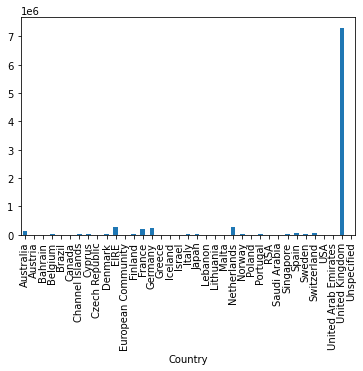

In [72]:
retail.groupby('Country')['checkoutprice'].sum().plot(kind='bar')

In [53]:
# 월별 매출

In [73]:
retail['month'] = retail.InvoiceDate.apply(lambda x : str(x)[:7])

In [74]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoutprice,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


<AxesSubplot:xlabel='month'>

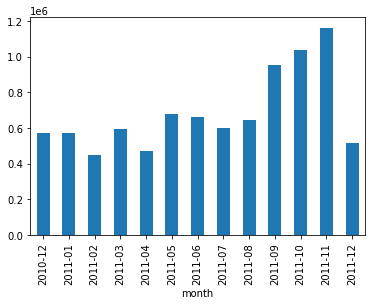

In [75]:
retail.groupby('month')['checkoutprice'].sum().plot(kind='bar')

In [76]:
# 매출 상위 10개 품목

In [79]:
retail.sort_values('checkoutprice',ascending=False)[:10].StockCode

540421     23843
61619      23166
222680     22502
173382      POST
348325     23243
160546     21108
52711      21108
421601     23084
52709     85123A
160542    85123A
Name: StockCode, dtype: object

### cohort 
- 유사한 집단간 비교분석
- 고객의 retention을 분석 => retention이 높은 집단 => 우수 고객
- 고객 세그먼트 : 언제 처음 구매를 했는가

In [ ]:
# 우수 고객
# - 구매 횟수 기분
# - 지불 금액 기준

In [88]:
retail.groupby('CustomerID')['checkoutprice'].count().\
sort_values(ascending=False).iloc[:10]

CustomerID
17841.0    7847
14911.0    5675
14096.0    5111
12748.0    4595
14606.0    2700
15311.0    2379
14646.0    2076
13089.0    1818
13263.0    1677
14298.0    1637
Name: checkoutprice, dtype: int64

In [87]:
retail.groupby('CustomerID')['checkoutprice'].sum().\
sort_values(ascending=False).iloc[:10]

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
Name: checkoutprice, dtype: float64

In [ ]:
# 어느 월에 구매한 고객이 retention이 높은가?

In [97]:
from datetime import datetime
def get_month_as_datetime(date):
    return datetime(date.year, date.month, 1)

In [99]:
retail['Month'] = retail['InvoiceDate'].apply(get_month_as_datetime)
retail.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoutprice,month,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01


In [103]:
# group 객체에 transform 메서드 적용 -> 그룹 내에서 함수를 적용한 값 출력
# 데이터 길이 만큼 출력
# 특정 데이터가 속한 그룹의 값으로 출력
retail['MonthStarted'] = retail.groupby('CustomerID')['Month'].transform(np.min)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoutprice,month,Month,MonthStarted
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01,2010-12-01


In [104]:
# 각 구매가 최초 구매로부터 얼마의 개월이 지났는지 계산 (단위 : 월)

In [112]:
retail['MonthPassed'] = (retail['Month'].dt.year - retail['MonthStarted'].dt.year) * 12 + \
(retail['Month'].dt.month - retail['MonthStarted'].dt.month)

In [113]:
retail.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoutprice,month,Month,MonthStarted,MonthPassed
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2010-12-01,2010-12-01,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01,2010-12-01,0


In [115]:
retail.tail(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoutprice,month,Month,MonthStarted,MonthPassed
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12,2011-12-01,2011-08-01,4
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011-12,2011-12-01,2011-08-01,4


In [119]:
def get_unique_no(x):
    return len(np.unique(x))
cohort_group = retail.groupby(['MonthStarted', 'MonthPassed'])
cohort_df = cohort_group['CustomerID'].apply(get_unique_no).reset_index()
cohort_df.head()

,MonthStarted,MonthPassed,CustomerID
0,2010-12-01,0,885
1,2010-12-01,1,324
2,2010-12-01,2,286
3,2010-12-01,3,340
4,2010-12-01,4,321


In [123]:
cohort_df = cohort_df.pivot(index = 'MonthStarted', columns = 'MonthPassed')

In [126]:
customer_cohort = cohort_df.div(cohort_df.iloc[:,0],axis = 0)
customer_cohort

CustomerID                                                    \
MonthPassed          0         1         2         3         4         5    
MonthStarted                                                                
2010-12-01          1.0  0.366102  0.323164  0.384181  0.362712  0.397740   
2011-01-01          1.0  0.220624  0.266187  0.230216  0.321343  0.287770   
2011-02-01          1.0  0.186842  0.186842  0.284211  0.271053  0.247368   
2011-03-01          1.0  0.150442  0.252212  0.199115  0.223451  0.168142   
2011-04-01          1.0  0.213333  0.203333  0.210000  0.196667  0.226667   
2011-05-01          1.0  0.190141  0.172535  0.172535  0.207746  0.232394   
2011-06-01          1.0  0.173554  0.157025  0.264463  0.231405  0.334711   
2011-07-01          1.0  0.180851  0.207447  0.223404  0.271277  0.111702   
2011-08-01          1.0  0.207101  0.248521  0.242604  0.124260       NaN   
2011-09-01          1.0  0.234114  0.301003  0.113712       NaN       NaN   
2011-10-01          1.0  0.240223  0.114525       NaN       NaN       NaN   
2011-11-01          1.0  0.111455       NaN       NaN       NaN       NaN   
2011-12-01          1.0       NaN       NaN       NaN       NaN       NaN   

                                                                          \
MonthPassed         6         7         8         9         10        11   
MonthStarted                                                               
2010-12-01    0.362712  0.349153  0.353672  0.395480  0.374011  0.502825   
2011-01-01    0.247002  0.242206  0.299760  0.326139  0.364508  0.117506   
2011-02-01    0.252632  0.278947  0.247368  0.305263  0.068421       NaN   
2011-03-01    0.267699  0.230088  0.278761  0.086283       NaN       NaN   
2011-04-01    0.216667  0.260000  0.073333       NaN       NaN       NaN   
2011-05-01    0.264085  0.095070       NaN       NaN       NaN       NaN   
2011-06-01    0.095041       NaN       NaN       NaN       NaN       NaN   
2011-07-01         NaN       NaN       NaN       NaN       NaN       NaN   
2011-08-01         NaN       NaN       NaN       NaN       NaN       NaN   
2011-09-01         NaN       NaN       NaN       NaN       NaN       NaN   
2011-10-01         NaN       NaN       NaN       NaN       NaN       NaN   
2011-11-01         NaN       NaN       NaN       NaN       NaN       NaN   
2011-12-01         NaN       NaN       NaN       NaN       NaN       NaN   

                        
MonthPassed         12  
MonthStarted            
2010-12-01    0.265537  
2011-01-01         NaN  
2011-02-01         NaN  
2011-03-01         NaN  
2011-04-01         NaN  
2011-05-01         NaN  
2011-06-01         NaN  
2011-07-01         NaN  
2011-08-01         NaN  
2011-09-01         NaN  
2011-10-01         NaN  
2011-11-01         NaN  
2011-12-01         NaN

<AxesSubplot:xlabel='None-MonthPassed', ylabel='MonthStarted'>

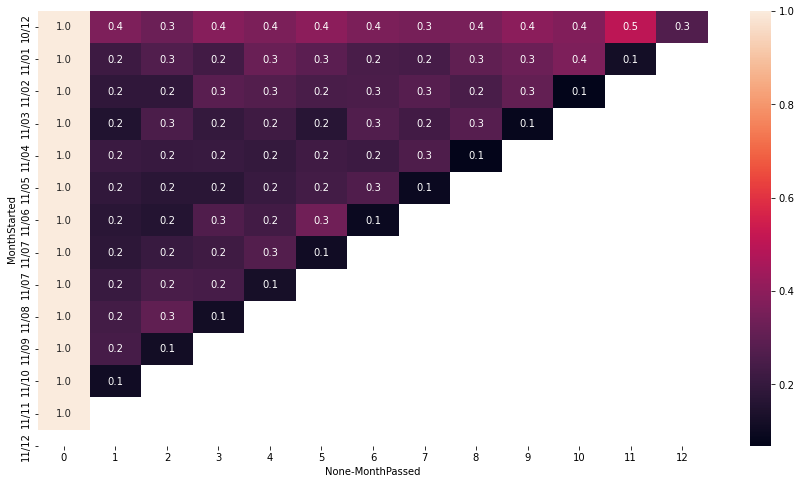

In [133]:
xticks = np.arange(0,13)
yticks = ['10/12','11/01','11/02','11/03','11/04','11/05','11/06','11/07',
         '11/07','11/08','11/09','11/10','11/11','11/12']

plt.figure(figsize = (15,8))
sns.heatmap(customer_cohort,
           annot=True,
           xticklabels = xticks,
           yticklabels = yticks,
           fmt = '.1f')

In [ ]:
#  push notification - 푸쉬 광고
# 개인별 맞춤 notification

In [3]:
dtypes = {'UniPrice':np.float32,
         'CustomerID' : np.float32,
         'Quantity' : np.int32}
df = pd.read_csv(r'C:\Users\User\OneDrive\바탕 화면\data/onlineretailclean.csv',
                    dtype = dtypes, index_col=0)

In [5]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoutprice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [4]:
# 구매가 가장 많은 시간대에 푸쉬광고를 하는게 가장 광고 효율이 높다

In [17]:
df.InvoiceDate.apply(lambda x : x.split()[1].split(':')[0])

0          8
1          8
2          8
3          8
4          8
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: InvoiceDate, Length: 397884, dtype: object

In [23]:
df.groupby(df.InvoiceDate.apply(lambda x : int(x.split()[1].split(':')[0])))['CustomerID']\
.count().sort_index()

InvoiceDate
6         1
7       379
8      8690
9     21944
10    37997
11    49084
12    72065
13    64026
14    54118
15    45369
16    24089
17    13071
18     2928
19     3321
20      802
Name: CustomerID, dtype: int64

In [26]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [33]:
df.set_index('InvoiceDate').groupby(lambda date : date.hour).count()['CustomerID']

InvoiceDate
6         1
7       379
8      8690
9     21944
10    37997
11    49084
12    72065
13    64026
14    54118
15    45369
16    24089
17    13071
18     2928
19     3321
20      802
Name: CustomerID, dtype: int64

In [34]:
# 사용자별 맞춤 notification
# - 특정 사용자가 어느 시간대에 구매를 많이하는지

In [39]:
order_count_by_hour = df.set_index('InvoiceDate').\
    groupby(['CustomerID',lambda date : date.hour]).count().StockCode
order_count_by_hour

CustomerID  InvoiceDate
12346.0     10              1
12347.0     8              22
            10             24
            12             47
            13             18
                           ..
18283.0     15              1
            16             56
            19             87
18287.0     9               3
            10             67
Name: StockCode, Length: 11205, dtype: int64

In [53]:
# idxmax() : 가장 큰 값을 가지는 index를 return
temp_df = order_count_by_hour.reset_index()
temp_df.groupby('CustomerID').idxmax()

,InvoiceDate,StockCode
CustomerID,,
12346.0,0,0
12347.0,6,5
12348.0,9,9
12349.0,10,10
12350.0,11,11
...,...,...
18280.0,11191,11191
18281.0,11192,11192
18282.0,11194,11194


In [58]:
push_notification = {}
time_list = []
for _ in range(24):
    time_list.append([])
for i in  order_count_by_hour.groupby('CustomerID').idxmax().values:
    time = i[1]
    userid = i[0]
    
    time_list[time].append(userid)

In [66]:
time_user_df = pd.DataFrame(time_list)

push_time = int(input('푸쉬할 시간을 입력하세요'))
time_user_df.iloc[push_time].dropna()

푸쉬할 시간을 입력하세요8


0      12405.0
1      12420.0
2      12452.0
3      12506.0
4      12562.0
        ...   
120    18080.0
121    18180.0
122    18232.0
123    18233.0
124    18235.0
Name: 8, Length: 125, dtype: float64